In [2]:
# required libs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# reading train and test datasets
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

In [4]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.loc[0][1:].shape

(784,)

In [6]:
# reshape image dataset to 28x28 matrix
train.loc[0][1:].values.reshape([28,28])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

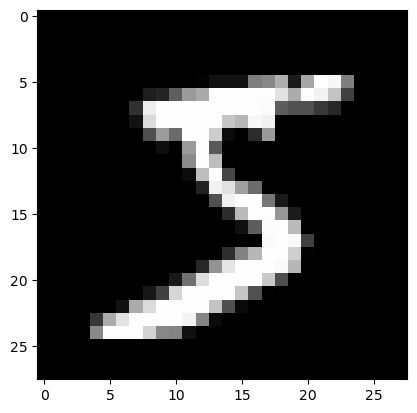

In [7]:
# read an image from the dataset
plt.imshow(train.loc[0][1:].values.reshape([28,28]), cmap='gray')

In [8]:
# quick preprocessing of dataset
train_x = train.drop(columns='label')
train_y = train.label

test_x = test.drop(columns='label')
test_y = test.label

## kNN

In [9]:
# sklearn's nearest neighbour 
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(train_x.values, train_y.values)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# predicting a single image (for testing purposes)
print(knn.predict([test_x.iloc[545]]))

[0]


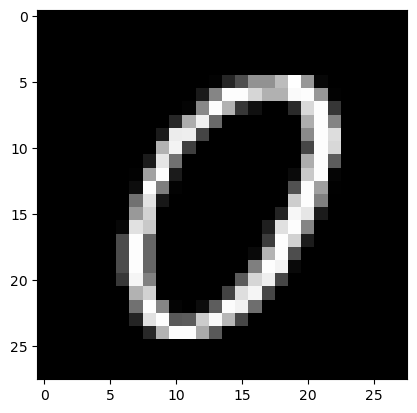

In [11]:
# visualising the predicted image
plt.imshow(test_x.iloc[545].values.reshape([28,28]), cmap='gray')

In [12]:
# predicting all images in matrix with knn
knn_results = knn.predict(test_x.values)

In [13]:
# calculate the accuracy score from the prediction results
accuracy_score(knn_results, test_y)

0.9705

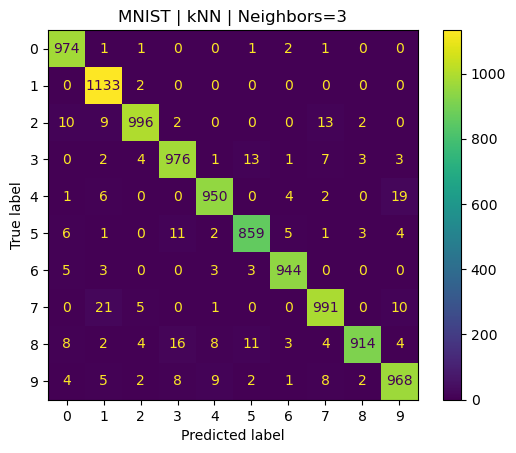

In [14]:
# confusion matrix showing all class results (true vs predicted)
matrix = confusion_matrix(test_y, knn_results, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=knn.classes_)
disp.plot()
plt.title(f"MNIST | kNN | Neighbors={knn.n_neighbors}")
plt.show()

## SVM

In [15]:
# sklearn's SVM
svm = LinearSVC(verbose=1, C=0.0001, random_state=0)

svm.fit(train_x.values, train_y.values)

c:\Users\Tommy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]

c:\Users\Tommy\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.0001, random_state=0, verbose=1)

In [16]:
print(svm.C)

0.0001


In [17]:
# predicting a single image (for testing purposes)
print(svm.predict([test_x.iloc[545]]))

[0]


In [18]:
# predicting all images using SVM
svm_results = svm.predict(test_x.values)

In [19]:
# calculate the accuracy score from the prediction results
accuracy_score(svm_results, test_y)

0.9115

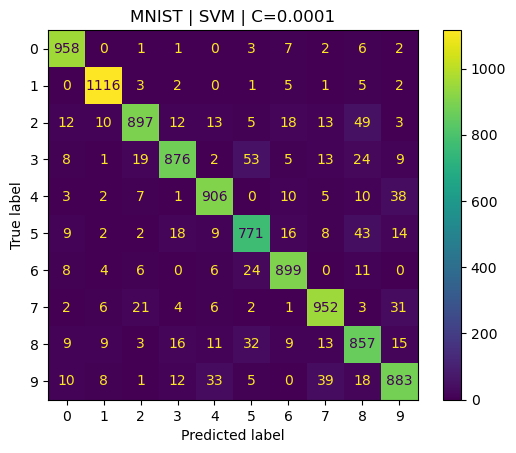

In [20]:
# confusion matrix showing all class results (true vs predicted)
matrix = confusion_matrix(test_y, svm_results, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=svm.classes_)
disp.plot()
plt.title(f"MNIST | SVM | C={svm.C}")
plt.show()

## Random Forest

In [21]:
# sklearn's random forest
rf = RandomForestClassifier(random_state=0, max_depth=30)

In [22]:
# build forest of trees using train data
rf.fit(train_x.values, train_y.values)

RandomForestClassifier(max_depth=30, random_state=0)

In [23]:
# predicting a single image (for testing purposes)
print(rf.predict([test_x.iloc[545]]))

[0]


In [24]:
# predicting all images using RF
rf_results = rf.predict(test_x.values)

In [25]:
# calculate the accuracy score from the prediction results
accuracy_score(rf_results, test_y)

0.97

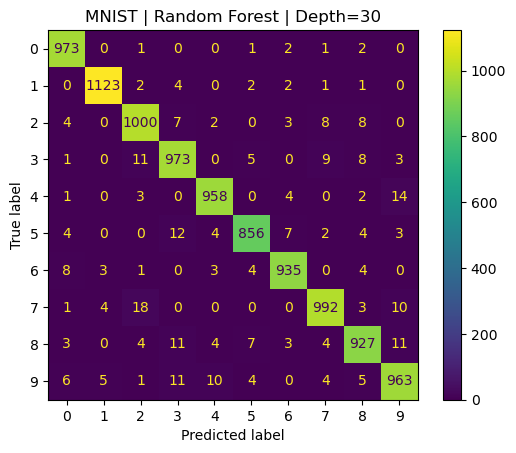

In [26]:
# confusion matrix showing all class results (true vs predicted)
matrix = confusion_matrix(test_y, rf_results, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=rf.classes_)
disp.plot()
plt.title(F"MNIST | Random Forest | Depth={rf.max_depth}")
plt.show()

## Ada Boost

In [27]:
# sklearn's adaboost
ab = AdaBoostClassifier(learning_rate=0.5 ,n_estimators=200, random_state=0)

In [28]:
# creating boosted classifier from train data
ab.fit(train_x.values, train_y.values)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=0)

In [29]:
# predicting a single image (for testing purposes)
print(ab.predict([test_x.iloc[545]]))

[5]


In [30]:
# predicting all images using aba boost
ab_results = ab.predict(test_x.values)

In [31]:
# calculate the accuracy score from the prediction results
accuracy_score(ab_results, test_y)

0.7785

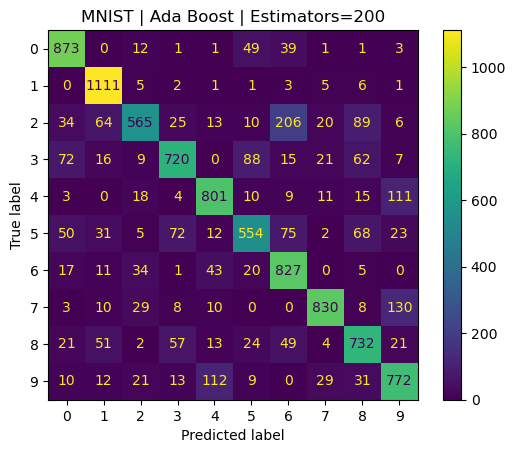

In [32]:
# confusion matrix showing all class results (true vs predicted)
matrix = confusion_matrix(test_y, ab_results, labels=ab.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=ab.classes_)
disp.plot()
plt.title(f"MNIST | Ada Boost | Estimators={ab.n_estimators}")
plt.show()